In [1]:
%matplotlib inline
import os

import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Using Theano backend.
Using gpu device 0: GeForce GTX 980 Ti (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


In [2]:
# Download datasets from:
# http://www.cs.ucr.edu/~eamonn/time_series_data/

DATASETS_DIR = "./UCR_TS_Archive_2015"

In [3]:
def _ls(datasets_dir):
    return os.listdir(datasets_dir)

def load_dataset(dataset):
    train = pd.read_csv(os.path.join(DATASETS_DIR, dataset, dataset + "_TRAIN"), header=None)
    test = pd.read_csv(os.path.join(DATASETS_DIR, dataset, dataset + "_TEST"), header=None)
    X_train = train.ix[:,1:].values
    y_train = train[0].values
    X_test = test.ix[:,1:].values
    y_test = test[0].values
    return X_train, y_train, X_test, y_test

In [4]:
for i, dataset in enumerate(_ls(DATASETS_DIR)):
    train = pd.read_csv(os.path.join(DATASETS_DIR, dataset, dataset + "_TRAIN"), header=None)
    test = pd.read_csv(os.path.join(DATASETS_DIR, dataset, dataset + "_TEST"), header=None)
    X_train = train.ix[:,1:].values
    y_train = train[0].values
    X_test = test.ix[:,1:].values
    y_test = test[0].values
    print i, dataset, X_train.shape, X_test.shape

0 uWaveGestureLibrary_Z (896, 315) (3582, 315)
1 DistalPhalanxOutlineCorrect (276, 80) (600, 80)
2 Gun_Point (50, 150) (150, 150)
3 BeetleFly (20, 512) (20, 512)
4 Lighting7 (70, 319) (73, 319)
5 CBF (30, 128) (900, 128)
6 OliveOil (30, 570) (30, 570)
7 Adiac (390, 176) (391, 176)
8 FordA (1320, 500) (3601, 500)
9 ProximalPhalanxOutlineCorrect (600, 80) (291, 80)
10 ECG5000 (500, 140) (4500, 140)
11 Cricket_Y (390, 300) (390, 300)
12 MoteStrain (20, 84) (1252, 84)
13 WormsTwoClass (77, 900) (181, 900)
14 FaceFour (24, 350) (88, 350)
15 ShapeletSim (20, 500) (180, 500)
16 ECG200 (100, 96) (100, 96)
17 Ham (109, 431) (105, 431)
18 DistalPhalanxOutlineAgeGroup (139, 80) (400, 80)
19 synthetic_control (300, 60) (300, 60)
20 UWaveGestureLibraryAll (896, 945) (3582, 945)
21 Worms (77, 900) (181, 900)
22 Lighting2 (60, 637) (61, 637)
23 MiddlePhalanxOutlineAgeGroup (154, 80) (400, 80)
24 InlineSkate (100, 1882) (550, 1882)
25 ScreenType (375, 720) (375, 720)
26 SwedishLeaf (500, 128) (625, 12

In [5]:
dataset = "ElectricDevices"
X_train, y_train, X_test, y_test = load_dataset(dataset)

Class: 5


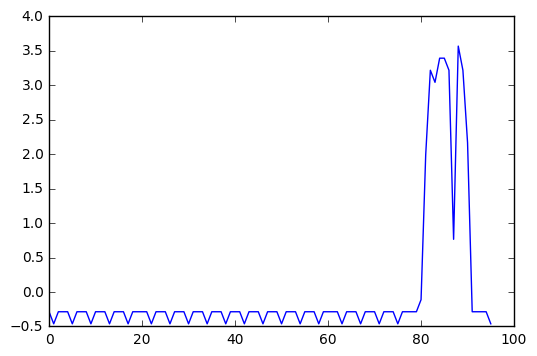

Class: 7


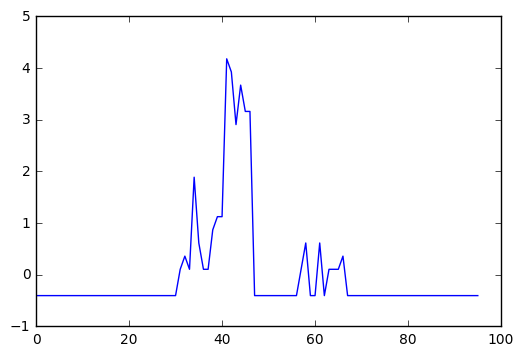

Class: 3


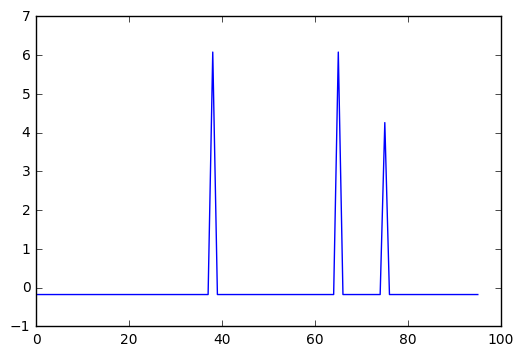

Class: 5


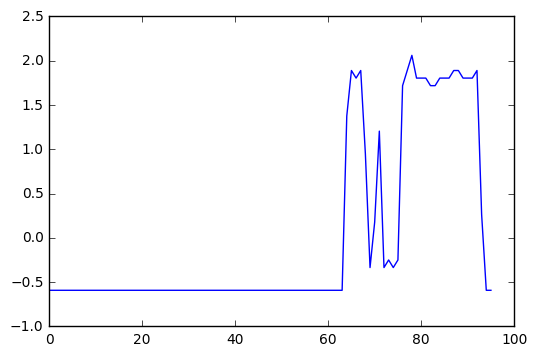

Class: 2


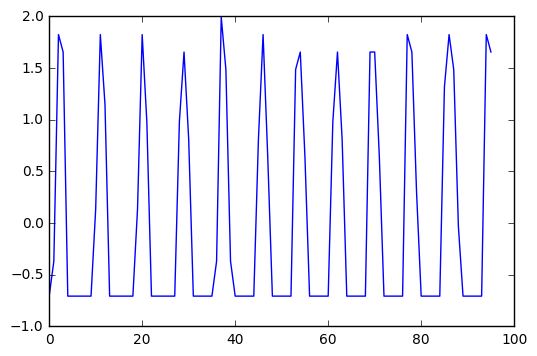

Class: 2


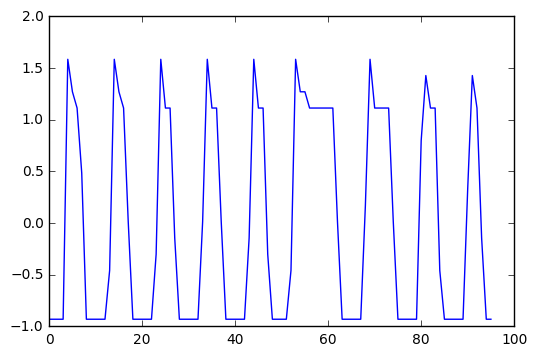

Class: 5


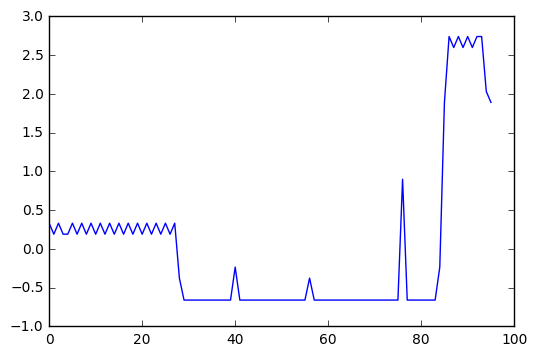

Class: 1


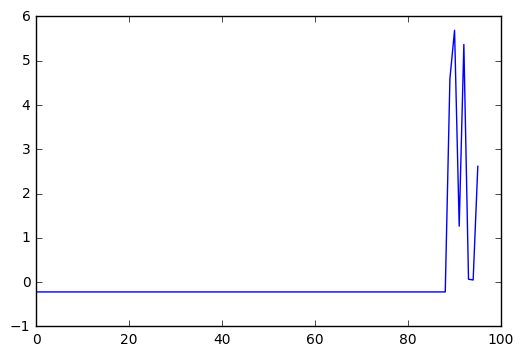

Class: 4


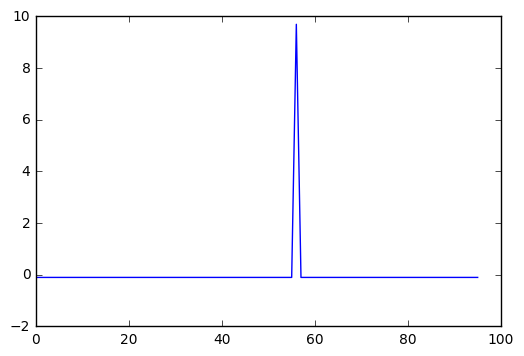

Class: 5


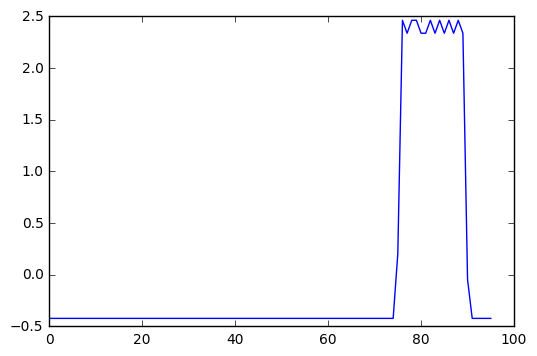

In [6]:
np.random.seed(743)
for _ in xrange(10):
    i = np.random.randint(len(X_train))
    print "Class:", y_train[i]
    plt.plot(X_train[i])
    plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, GRU, SimpleRNN
from keras.preprocessing import sequence
from keras.layers.convolutional import Convolution1D, MaxPooling1D

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score

In [8]:
oh = OneHotEncoder(sparse=False)
oh.fit(y_train.reshape(-1,1))
oh_y_train = oh.transform(y_train.reshape(-1,1))
oh_y_test = oh.transform(y_test.reshape(-1,1))

In [9]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 100)           40800       lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 7)             707         lstm_1[0][0]                     
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 7)             0           dense_1[0][0]                    
Total params: 41507
____________________________________________________________________________________________________
None
Epoch 1/3
8926/8926 [==============================] - 11s - loss: 1.2053 - acc: 0.5763    
Epoch 2/3
8926/8926 [==============================] - 6s - loss: 0.9417 - 

In [10]:
model = Sequential()
model.add(SimpleRNN(100, input_shape=(X_train.shape[1],1)))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
simplernn_1 (SimpleRNN)          (None, 100)           10200       simplernn_input_1[0][0]          
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 7)             707         simplernn_1[0][0]                
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 7)             0           dense_2[0][0]                    
Total params: 10907
____________________________________________________________________________________________________
None
Epoch 1/3
8926/8926 [==============================] - 1s - loss: 1.5414 - acc: 0.4560     
Epoch 2/3
8926/8926 [==============================] - 1s - loss: 1.3690 - 

In [11]:
model = Sequential()
model.add(GRU(100, input_shape=(X_train.shape[1],1)))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
gru_1 (GRU)                      (None, 100)           30600       gru_input_1[0][0]                
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 7)             707         gru_1[0][0]                      
____________________________________________________________________________________________________
activation_3 (Activation)        (None, 7)             0           dense_3[0][0]                    
Total params: 31307
____________________________________________________________________________________________________
None
Epoch 1/3
8926/8926 [==============================] - 10s - loss: 1.3923 - acc: 0.4991    
Epoch 2/3
8926/8926 [==============================] - 11s - loss: 0.9241 -

In [12]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],1)))
model.add(Dropout(.6))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_2 (LSTM)                    (None, 100)           40800       lstm_input_2[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 100)           0           lstm_2[0][0]                     
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 7)             707         dropout_1[0][0]                  
____________________________________________________________________________________________________
activation_4 (Activation)        (None, 7)             0           dense_4[0][0]                    
Total params: 41507
_______________________________________________________________________

In [13]:
model = Sequential()
model.add(Convolution1D(
    nb_filter=32, filter_length=3, border_mode='same',
    activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_length=2))
model.add(LSTM(100))
model.add(Dropout(.6))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_1 (Convolution1D)  (None, 96, 32)        128         convolution1d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling1d_1 (MaxPooling1D)    (None, 48, 32)        0           convolution1d_1[0][0]            
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           53200       maxpooling1d_1[0][0]             
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_3[0][0]                     
___________________________________________________________________________________________

In [14]:
model = Sequential()
model.add(Convolution1D(
    nb_filter=32, filter_length=3, border_mode='same',
    activation='relu', input_shape=(X_train.shape[1],1)))
model.add(MaxPooling1D(pool_length=2))
model.add(GRU(100))
model.add(Dropout(.6))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_2 (Convolution1D)  (None, 96, 32)        128         convolution1d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling1d_2 (MaxPooling1D)    (None, 48, 32)        0           convolution1d_2[0][0]            
____________________________________________________________________________________________________
gru_2 (GRU)                      (None, 100)           39900       maxpooling1d_2[0][0]             
____________________________________________________________________________________________________
dropout_3 (Dropout)              (None, 100)           0           gru_2[0][0]                      
___________________________________________________________________________________________

In [15]:
for C in [.1, 1., 10., 100.]:
    model = SVC(C=C, probability=True, random_state=743).fit(X_train, y_train)
    print "C:", C, "log_loss:", log_loss(y_test, model.predict_proba(X_test))
    

C: 0.1 log_loss: 1.34486598264
C: 1.0 log_loss: 1.31571309148
C: 10.0 log_loss: 1.33992360468
C: 100.0 log_loss: 1.36885195969


In [19]:
for n_estimators in [50, 500]:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=743).fit(X_train, y_train)
    print "n_estimators:", n_estimators, "log_loss:", log_loss(y_test, model.predict_proba(X_test))
    

n_estimators: 50 log_loss: 2.13475004287
n_estimators: 500 log_loss: 1.517141814


In [20]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],1), return_sequences=True))
model.add(Dropout(.5))
model.add(LSTM(100))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train.reshape(X_train.shape+(1,)), oh_y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_8 (LSTM)                    (None, 96, 100)       40800       lstm_input_4[0][0]               
____________________________________________________________________________________________________
dropout_6 (Dropout)              (None, 96, 100)       0           lstm_8[0][0]                     
____________________________________________________________________________________________________
lstm_9 (LSTM)                    (None, 100)           80400       dropout_6[0][0]                  
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 7)             707         lstm_9[0][0]                     
___________________________________________________________________________________________

In [21]:
from keras.layers.core import Merge, TimeDistributedDense
from keras.layers.wrappers import TimeDistributed, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1],1), merge_mode="sum"))
model.add(Dropout(.5))
model.add(Bidirectional(LSTM(100), merge_mode="sum"))
model.add(Dense(len(set(y_train))))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(
    X_train.reshape(X_train.shape+(1,)),
    oh_y_train,
    nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test.reshape(X_test.shape+(1,)), oh_y_test, verbose=0)
print "log_loss:", scores[0]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
bidirectional_3 (Bidirectional)  (None, 96, 100)       81600       bidirectional_input_2[0][0]      
____________________________________________________________________________________________________
dropout_7 (Dropout)              (None, 96, 100)       0           bidirectional_3[0][0]            
____________________________________________________________________________________________________
bidirectional_4 (Bidirectional)  (None, 100)           160800      dropout_7[0][0]                  
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 7)             707         bidirectional_4[0][0]            
___________________________________________________________________________________________